# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.003
-0.003
-0.004
-0.004
-0.002
0.0
-0.002
-0.003
-0.002
0.982
0.984
0.986
0.986
0.985
1.979
1.978
1.978
1.979
2.981
2.981
2.98
2.98
3.979
3.981
3.982
3.982
3.983
3.983
4.985
4.984
4.983
5.971
5.971
5.97
5.97
6.521
6.521
6.521
7.066
7.07
7.07
7.07
7.07
8.066
8.069
8.071
8.07
8.07
9.058
9.064
9.064
9.064
9.067
10.06
10.062
10.064
10.064
10.063
11.06
11.065
11.066
11.062
11.062
12.058
12.064
12.063
12.062
12.062
13.056
13.061
13.059
13.059
13.061
13.71
13.712
13.715
13.713
13.713
14.363
14.364
14.368
14.367
14.366
15.369
15.369
15.369
15.37
16.371
16.371
16.37
16.371
17.371
17.371
17.371
17.371
18.369
18.374
18.373
18.373
18.373
18.373
19.379
19.378
19.378
19.378
19.378
20.374
20.372
20.373
21.157
21.163
21.158
21.159
21.162
21.981
21.981
21.979
21.978
22.969
22.969
22.971
23.971
23.971
23.972
24.974
24.973
24.973
24.973
25.974
25.974
25.973
25.973
26.976
26.978
26.977
26.977
27.999
28.0
27.998
27.999
28.

56.777
56.777
56.776
56.776
56.77
56.77
56.768
56.795
56.798
56.796
56.796
56.795
56.795
56.795
56.795
56.795
56.798
56.796
56.795
56.794
56.794
56.794
56.794
56.792
56.792
56.792
56.792
56.793
56.793
56.792
56.793
56.793
56.794
56.794
56.791
56.791
56.792
56.793
56.793
56.793
56.793
56.79
56.79
56.792
56.79
56.79
56.788
57.012
57.012
57.014
57.014
57.015
57.015
57.016
57.016
57.016
57.042
57.042
57.042
57.042
57.042
57.059
57.059
57.059
57.059
57.057
57.057
57.057
57.055
57.054
57.056
57.055
57.055
57.055
57.056
57.055
57.054
57.054
57.052
57.052
57.053
57.053
57.053
57.052
57.052
57.05
57.05
57.051
57.051
57.051
57.051
57.051
57.052
57.052
57.051
57.052
57.049
57.049
57.05
57.051
57.049
57.05
57.318
57.318
57.316
57.316
57.317
57.316
57.342
57.342
57.341
57.341
57.329
57.329
57.359
57.358
57.357
57.357
57.355
57.355
57.355
57.356
57.355
57.354
57.354
57.354
57.357
57.355
57.354
57.354
57.354
57.355
57.355
57.35
57.351
57.352
57.352
57.354
57.351
57.354
57.352
57.352
57.352
57.35
57.3

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1449,2898,59.843
1450,2900,59.843
1451,2902,59.843
1452,2904,59.843


<IPython.core.display.Javascript object>


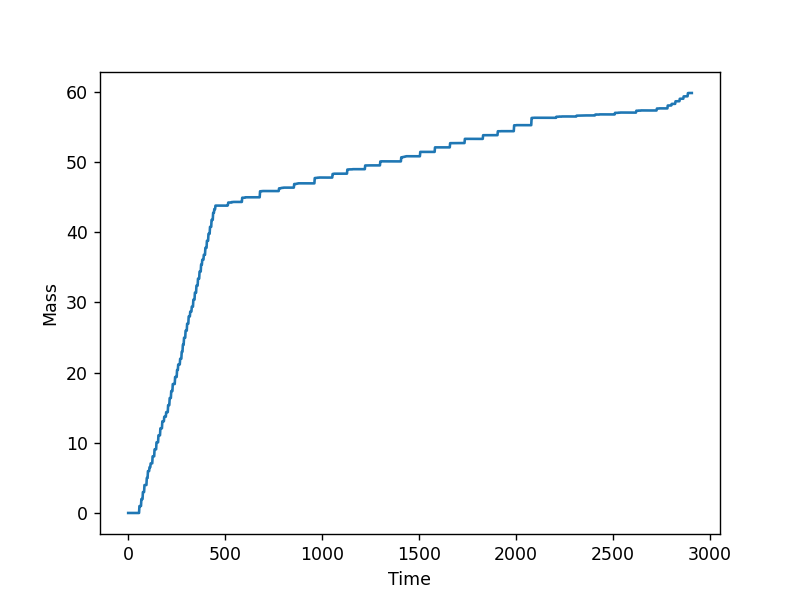

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_180723_S661-666.csv')